In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jupyter_black

jupyter_black.load()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from acoustics.constants import speed_of_sound
from acoustics.plot import plot

# Room shape and dimensions

<img src="../images/media-room-model.png" width=500/>

In the general case modal calculations are estimates as the real-world values are complex and influenced by the structral and acoustic behaviors of the materaials in the room. As you can see above the room being discussed here isn't rectangular and thus any estimates and calculations using the simple methods here are even fuzzier. It's still interesting to explore.

We'll simplify the room and use its average size.

The work done here is based on the Master Handbook of Acoustics 4th Eddition, p324

In [4]:
# In meters:
height = 2.52095
left_front_length = 2.5781
left_back_length = 2.7559
front_width = 3.6957
back_width = 3.95605
# weighted average width
width = ((front_width * left_front_length) + (back_width * left_back_length)) / (
    left_front_length + left_back_length
)
length = left_front_length + left_back_length
print(f"Room length is {length:0.2f}m, width {width:.2f}m, height {height:.2f}m")

Room length is 5.33m, width 3.83m, height 2.52m


In [5]:
# some shortcuts
length2 = length * length
width2 = width * width
height2 = height * height

## Very low frequencies

Frequencies where the room is not large enough to support standing waves. Below this point the behavior of sound in the room will be extremely complex.

In [6]:
# very low frequency, room can't support standing waves lower than this, the longest dimension of the room
F1 = speed_of_sound / (2 * np.sqrt(length2 + width2 + height2))
print(f"F1 is {F1:.0f}Hz")

F1 is 24Hz


## Schroeder Cutoff Frequency

The Schroeder Cutoff Frequency is a rough upper limit for the modal behavior of the room.

Note that the decay time of the room has an impact on the modal cutoff frequency. For now we'll use the Tm value from the decay-time notebook. We'll include some exploration of the impact of the decay time on modal behavior below.

In [7]:
Tm = 0.240
F2 = 2000 * np.sqrt(Tm / (length * width * height))
print(f"F2 is {F2:.0f}Hz")

F2 is 137Hz


## Transistion Region

A region where neither wave nor ray method do a good job of approximating the acoustic behavior of the room

In [8]:
F3 = 4 * F2
print(f"F3 is {F3:.0f}Hz")

F3 is 546Hz


## Impact of Decay Time on the Schroeder Cutoff Frequency (F2)

As can be seen below the decay time can have a huge impact on the Schroeder Cutoff Frequency, in the case of the room being modeled shifting it between 100-300Hz with the ideal value marked.

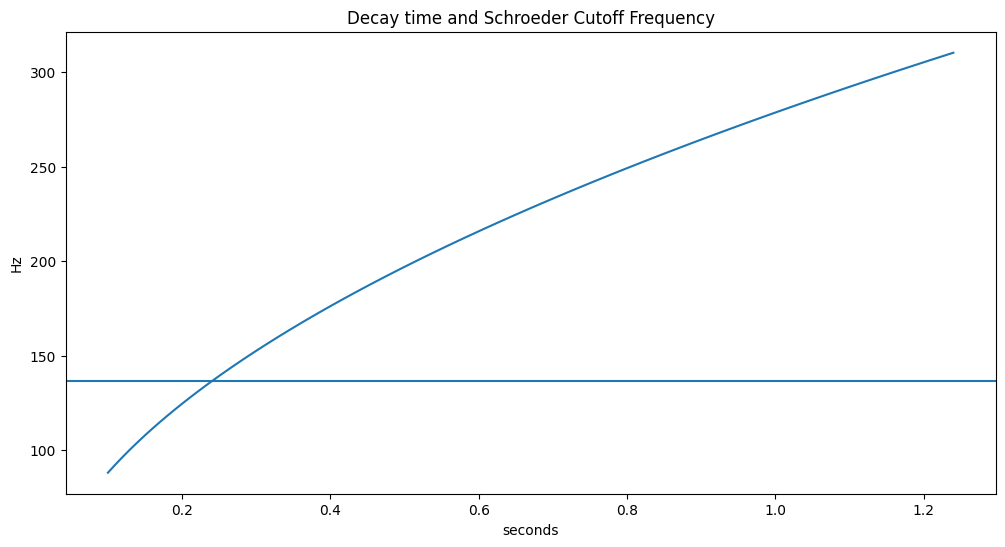

In [9]:
T = np.arange(0.1, 1.25, 0.01)

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)
ax = fig.add_subplot()

ax.plot(T, 2000 * np.sqrt(T / (length * width * height)))
ax.axhline(F2)
ax.set_title("Decay time and Schroeder Cutoff Frequency")
ax.set_ylabel("Hz")
ax.set_xlabel("seconds")
None

## Distribution of Room Modes

Again we're using the ideal decay time Tm for the room. If the actual decay time is higher there will be  more room mode activated at higher frequencies.

The following is based on the Master Handbook of Acoustics 4th Eddition, p327

In [10]:
nth = 12
modes = []
# this is going to do a bunch of math just to throw out the results...
for p in range(0, nth):
    p2 = p * p
    for q in range(0, nth):
        q2 = q * q
        for r in range(0, nth):
            r2 = r * r
            f = (speed_of_sound / 2) * np.sqrt(
                (p2 / length2) + (q2 / width2) + (r2 / height2)
            )
            if 0 < f and f <= F2:
                modes.append(
                    {
                        "freq": f,
                        "p": p,
                        "q": q,
                        "r": r,
                    }
                )

modes.sort(key=lambda m: m["freq"])
modes

[{'freq': 32.15223097112861, 'p': 1, 'q': 0, 'r': 0},
 {'freq': 44.77556411662794, 'p': 0, 'q': 1, 'r': 0},
 {'freq': 55.123652803338985, 'p': 1, 'q': 1, 'r': 0},
 {'freq': 64.30446194225722, 'p': 2, 'q': 0, 'r': 0},
 {'freq': 68.02990935956683, 'p': 0, 'q': 0, 'r': 1},
 {'freq': 75.2451627939742, 'p': 1, 'q': 0, 'r': 1},
 {'freq': 78.35760950696152, 'p': 2, 'q': 1, 'r': 0},
 {'freq': 81.44273883799058, 'p': 0, 'q': 1, 'r': 1},
 {'freq': 87.55961207002883, 'p': 1, 'q': 1, 'r': 1},
 {'freq': 89.55112823325588, 'p': 0, 'q': 2, 'r': 0},
 {'freq': 93.61160394499224, 'p': 2, 'q': 0, 'r': 1},
 {'freq': 95.14815039857497, 'p': 1, 'q': 2, 'r': 0},
 {'freq': 96.45669291338584, 'p': 3, 'q': 0, 'r': 0},
 {'freq': 103.7688948342245, 'p': 2, 'q': 1, 'r': 1},
 {'freq': 106.34258201562287, 'p': 3, 'q': 1, 'r': 0},
 {'freq': 110.24730560667797, 'p': 2, 'q': 2, 'r': 0},
 {'freq': 112.4609849473137, 'p': 0, 'q': 2, 'r': 1},
 {'freq': 116.96682902319237, 'p': 1, 'q': 2, 'r': 1},
 {'freq': 118.03373320901

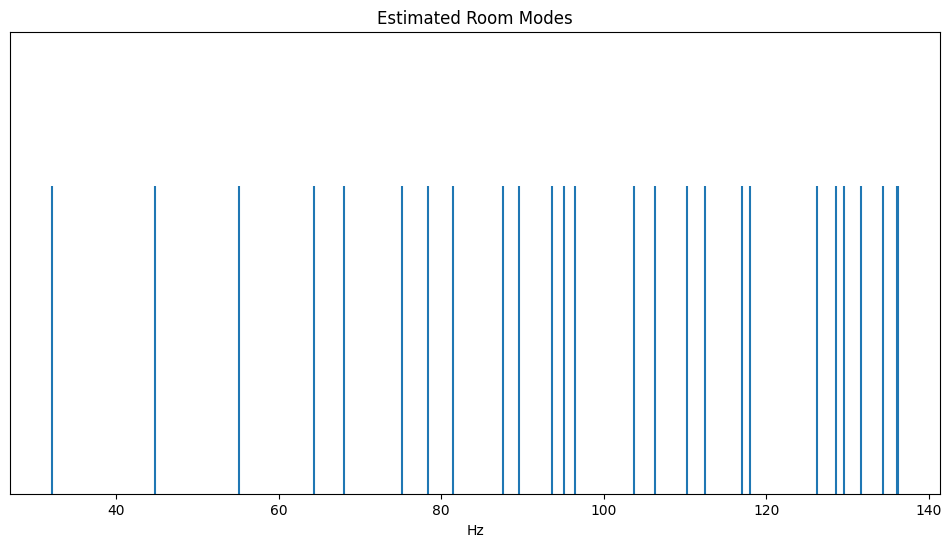

In [11]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)
ax = fig.add_subplot()

ax.vlines([m["freq"] for m in modes], 0, 1)
ax.set_xlabel("Hz")
ax.set_ylim(0, 1.5)
ax.get_yaxis().set_visible(False)
ax.set_title("Estimated Room Modes")

None

## Impact of decay time on the Modal Bandwidth

Another interesting impact of the decay time on the width of the modal nodes. The denser and more overlapped the modal nodes are the less likely they'll be active in the room. 

Lower decay times broaden the bandwidth of the nodes. Longer decay times narrow them up. As a result reducing the rooms decay time has a double acting postivie impact: directly on the reduction of build up of the standing waves themsevles, and secondarily on increasing the overlap of modes and making them less likely to be active.

In [12]:
def plot_modal_bandwidths(t):
    fig = plt.figure()
    fig.set_figheight(6)
    fig.set_figwidth(12)
    ax = fig.add_subplot()

    bw = 2.2 / t
    for mode in modes:
        f = mode["freq"]

        mx = np.array((f - bw, f, f + bw))
        my = np.array((0.7, 1, 0.7))

        # calculate polynomial
        z = np.polyfit(mx, my, 2)
        fn = np.poly1d(z)

        x_new = np.arange(f - 2 * bw, f + 2 * bw, 0.01)
        y_new = fn(x_new)
        ax.plot(x_new, y_new)

        ax.annotate(f"{f:0.1f}", (f, 1.02))

    ax.set_xscale("log")
    ax.set_xlabel("Hz")
    ax.set_ylim(0, 1.5)
    ax.get_yaxis().set_visible(False)

    xt = [15, 20, 40, 60, 80, 100, 140, 200, 400, 800, 1600, 3200, 6400, 12800, 20000]
    xt = [i for i in xt if i <= F2]
    ax.set_xticks(xt)
    xticklabels = [f"{i:d}" for i in xt]
    ax.set_xticklabels(xticklabels)

## Ideal Decay Time

With the ideal decay time there's a lot of overlap across the modal bandwidths increasing the effective density and reducing their activation and improving the room's behavior.

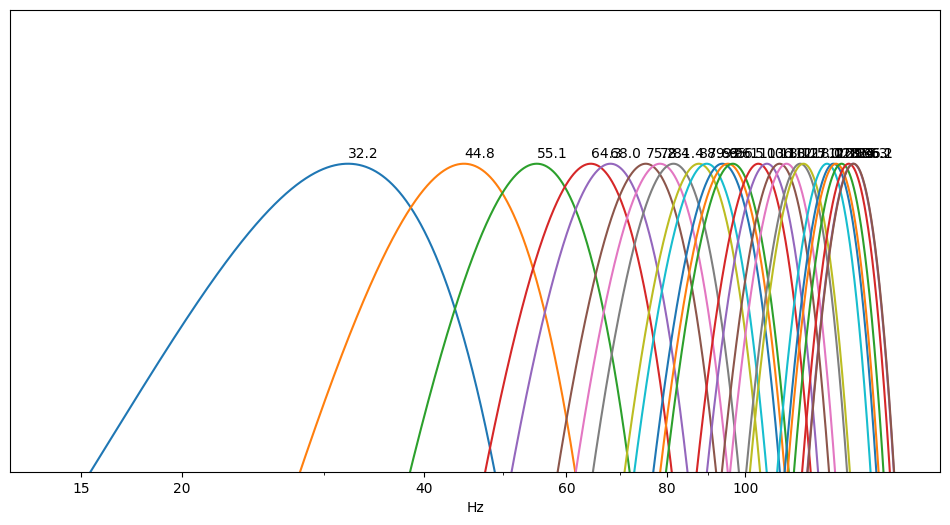

In [13]:
plot_modal_bandwidths(Tm)

## Wetter Room

A realistic decay time of 750ms for an untreated room with mostly hard surfaces, plaster & lathe, hardwood floors, curtains open, etc. 

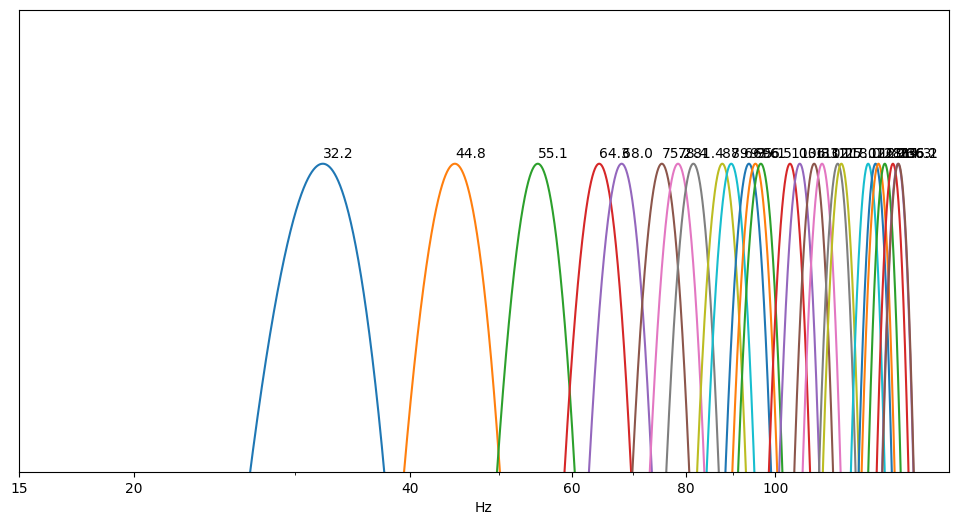

In [14]:
plot_modal_bandwidths(0.750)

## Middle Ground

Realistic for an untreated, but fully furnished room set up for listening. Heavy carpet, cushy couch & ottoman, curtains closed, etc.

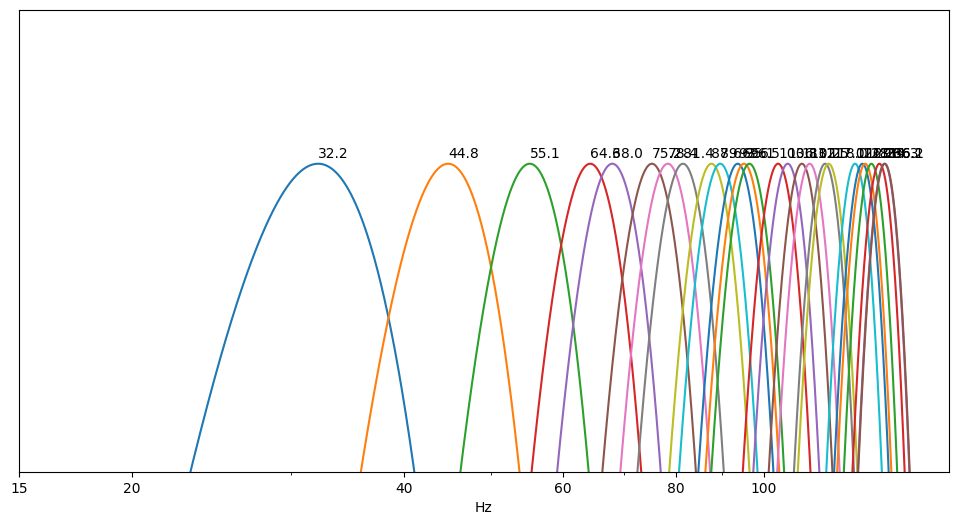

In [15]:
plot_modal_bandwidths(0.450)